# Assignment Grading and Feedback Program

# Design Process

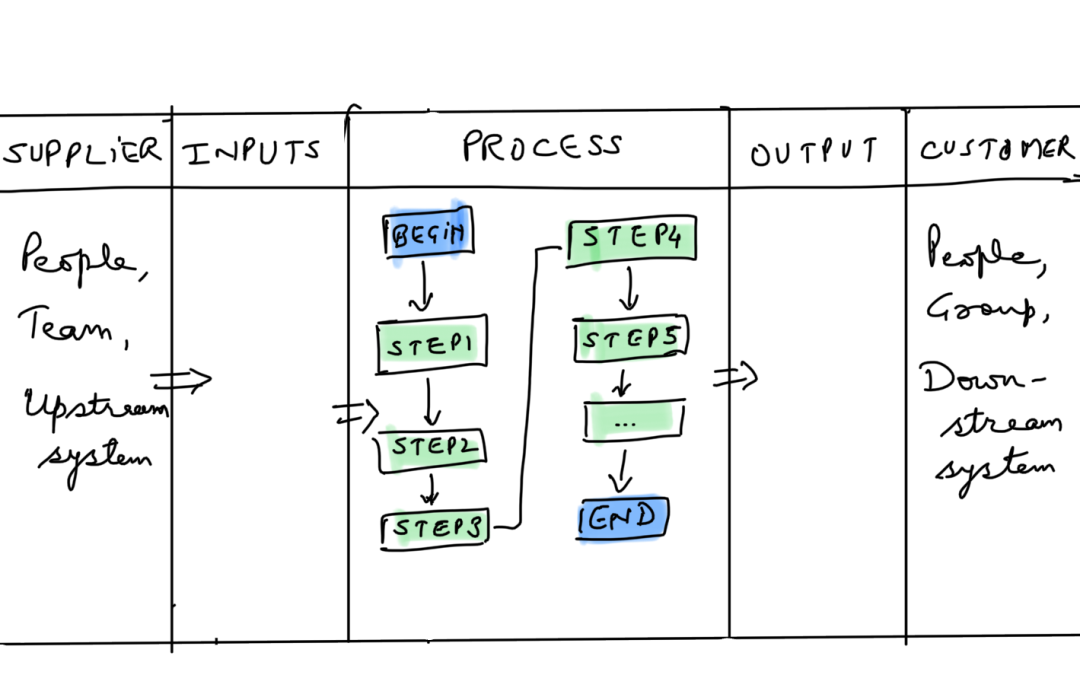

# SETUP DATABASE - MARIA DB 

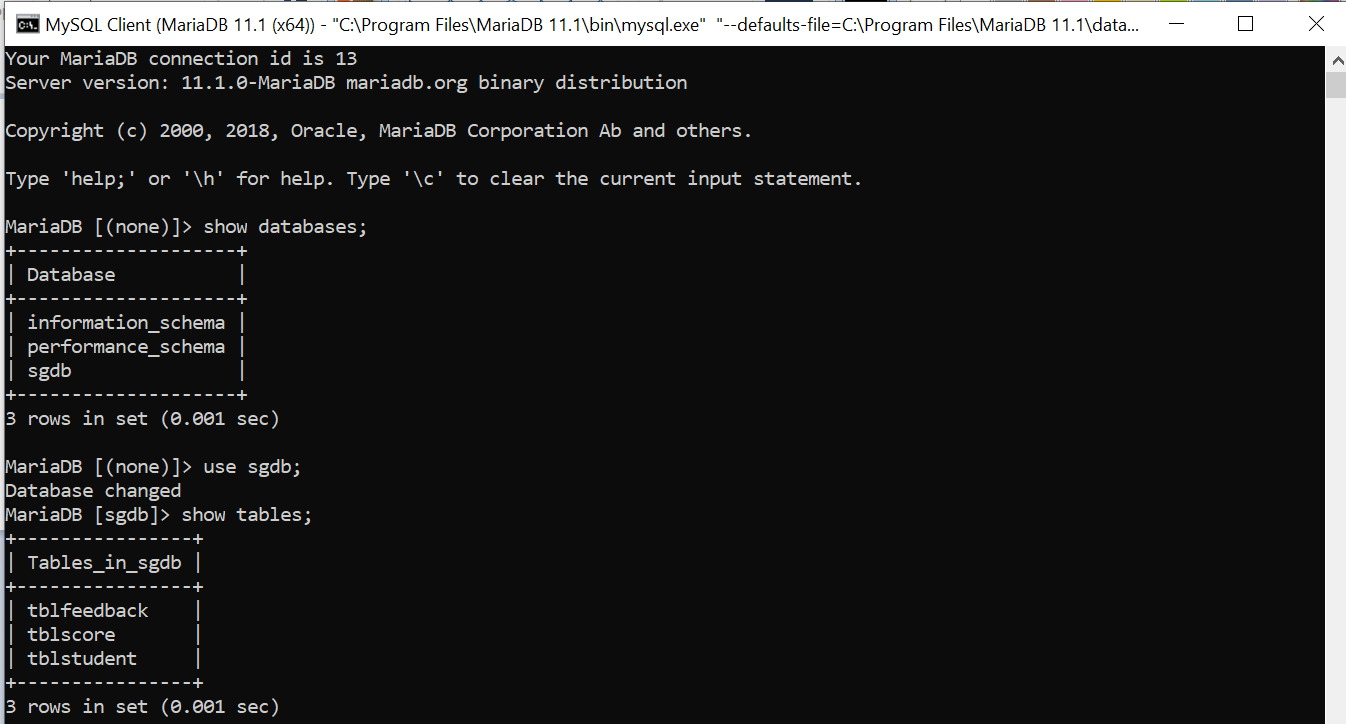

In [52]:
#CONNECT TO DATABASE

import mariadb
import sys

# Connect to MariaDB Platform
try:
    conn = mariadb.connect(
        user="root",
        password="root",
        host="127.0.0.1",
        port=3306,
        database="SGDB"            

    )
except mariadb.Error as e:
    print(f"Error connecting to MariaDB Platform: {e}")
    sys.exit(1)

# Get Cursor
cur = conn.cursor()
cur

<mariadb.cursor at 000002101AB9CB80>

# 3 STEPS PROCESS

STEP 1 : Check for ungraded assignments.

In [ ]:
import os
for filename in os.listdir('Source/Not Graded'):
    if filename.endswith(".py"):
        SN=filename.split('.')[0]
        print(SN, '\t', filename)        

STEP 2 : Run the Students program

In [ ]:
import os
path=os.path.abspath('Source/Not Graded')
print(path)

%run -i "C:\Users\sbatukdeo\CSC457\Sandbox\Source\Not Graded\Surendra_Batukdeo.py"

STEP 3 : Check the format.

CASE A : Correct Format.

In [3]:
SPN='111-222-3333'

In [ ]:
#Case 1 : Score = 1
#12 characters. 10 numbers. 2 '-' sep. in the 0,1, order. 

import re
if (len(SPN) == 12):
    if ( (len(re.split('-', SPN)[0]) == 3) and (len(re.split('-', SPN)[1]) == 3) and (len(re.split('-', SPN)[2]) == 4) ):
        if(SPN[3] == '-' and SPN[7] == '-'):
            if(re.split('-', SPN)[0].isdigit() and re.split('-', SPN)[1].isdigit() and re.split('-', SPN)[2].isdigit() ):   
               print("Score is 1")  

Insert the Score and Feedback into Maria DB

In [ ]:
score1 = "INSERT INTO tblScore (Score) VALUES (%s)"
score_val1 = [("1")
cur.execute(score1, score_val1)
       
feedback1 = "INSERT INTO tblFeedback (Score) VALUES (%s)"
feedback_val1 = [("Good Work")
cur.execute(feedback1, feedback_val1)
       
sgdb.commit()
sgdb.close()      

CASE B : Incorrect Format.

In [ ]:
#Incorrect format. 9 digits. 
SPN='111-222-333'

In [ ]:
#Case 2 : Score = 0
#NOT 12 characters. NOT 10 numbers. NOT 2 '-' sep. in the 0,1, order.

import re
#print(SPN)

if (len(SPN) != 12):
    if ( (len(re.split('-', SPN)[0]) != 3) or (len(re.split('-', SPN)[1]) != 3) or (len(re.split('-', SPN)[2]) != 4) ):
        #if(SPN[3] == '-' or SPN[7] == '-'):
            #if(re.split('-', SPN)[0].isdigit() or re.split('-', SPN)[1].isdigit() or re.split('-', SPN)[2].isdigit()):   
                print("Score is 0")

Insert the Score into Maria DB

In [ ]:
score0 = "INSERT INTO tblScore (Score) VALUES (%s)"
score_val0 = [("0")
cur.execute(score0, score_val0)
       
feedback0 = "INSERT INTO tblFeedback (Score) VALUES (%s)"
feedback_val0 = [("Incorrect Format")
cur.execute(feedback0, feedback_val0)
       
sgdb.commit()
sgdb.close() 

In [14]:
SPN

'111-222-3333'

CASE C : Duplicates

In [100]:
#CONNECT TO DATABASE

import mariadb
import sys

# Connect to MariaDB Platform
try:
    conn = mariadb.connect(
        user="root",
        password="root",
        host="127.0.0.1",
        port=3306,
        database="SGDB"            

    )
except mariadb.Error as e:
    print(f"Error connecting to MariaDB Platform: {e}")
    sys.exit(1)

# Get Cursor
cur = conn.cursor()

cur

<mariadb.cursor at 000002101ABB0DC0>

In [101]:
SPN

'111-222-3333'

In [102]:
query = f"SELECT * FROM tblStudent"
cur.execute(query)

data = cur.fetchall()

for i in range(2):
    for j in range(2):
        if(data[i][j] == SPN):
            if(i != 0 or j != 0):
                print("Score of -1 ")

#conn.close()

Score of -1 


Insert the Score into Maria DB

In [ ]:
scoreNEG1 = "INSERT INTO tblScore (Score) VALUES (%s)"
score_valNEG1 = [("-1")
cur.execute(scoreNEG1, score_valNEG1)
       
feedbackNEG1 = "INSERT INTO tblFeedback (Score) VALUES (%s)"
feedback_valNEG1 = [("Same Number used by another student. Plagiarism detected. ")
cur.execute(feedbackNEG1, feedback_valNEG1)
       
sgdb.commit()
sgdb.close() 

# Run the program in a shell

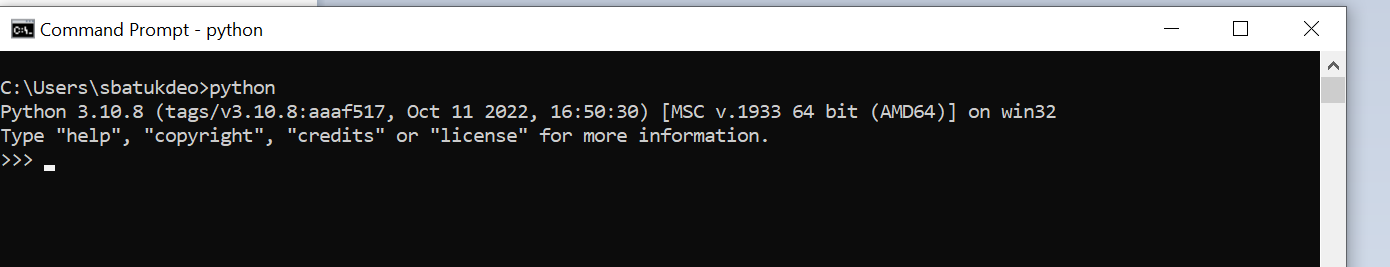

# The End